## learning-AI101 : insight 1
### 2024.07.17.에 진행한 세미나 기록 및 학습

<br>

- **임규연 (lky473736)**
- 2024.07.22. ~ 2024.07.28.

------

- (1) hongong/FAQ.md 1~13번에 대한 해설
- (2) 블로그 자료 (LR, SVM, DT, RF)에 대한 해설
- (3) RNN과 LSTM에 대한 개괄
- (4) /report/classification_abalone.ipynb에 대한 피드백


#### (1)
- 일반적 프로그래밍과 머신러닝 프로그래밍과의 차이 : 규칙 (rule)의 수동 입력? 자동 입력?
    - 전통적인 프로그래밍 : rule을 수동적으로 입력해주어야 했음
    - 머신러닝 프로그래밍 : 데이터를 입력하면 rule을 자체적으로 생성
- 지도, 비지도 학습의 차이 : label (target, 정답)의 유무
    - 비지도 학습의 연구가 늘어나는 이유 : 모든 데이터에 label을 붙이는 과정이 까다로움 
    - 따라서 label을 자동으로 붙이는 기술도 develop
- 차원의 저주 : 차원이 너무 많아질 수록 overfitting될 수도 있으며, 이해가 어렵다
    - 이를테면 SVM에서 feature가 너무 많으면, hyperplane을 결정하기가 매우 까다롭고 직관적 이해가 거의 불가능해짐
    - 따라서 feature selection이나 feature engineering과 같은 기술로 이를 해결
    - 중요도가 높은 feature나 상관관계가 높은 feature만 extraction하여 fit
- ridge vs lasso : 규제 (regularization) -> overfitting 방지
    - ridge : L2, 제곱항이 결정계수 이하
    - lasso : L1, 절댓값 항이 결정계수 이하
- 절편과 기울기가 딥러닝에서 사용되는 것은 퍼셉트론 각각의 weight와 bias
    - 딥러닝은 사실 weight와 bias를 epoch를 거듭하여 수정하여 최적의 parameter를 찾는 과정 
    - SGD 참고

#### (2)
- LR : 2024. 07. 28. 예정
    - https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
    - https://m.blog.naver.com/winddori2002/221706766540
- SVM : 2024. 07. 27. 읽음
    - https://m.blog.naver.com/winddori2002/221662413641
- DT : 2024. 07. 27. 읽음
    - https://lucy-the-marketer.kr/ko/growth/decision-tree-and-impurity/
- RF : 2024. 07. 28. 예정
    - https://velog.io/@dlskawns/Machine-Learning-Random-Forest-정리-구성원리-파악-및-모델-작성

#### (2-1) SVM (Support Vector Machine)

<img src="https://blog.kakaocdn.net/dn/dyU2w7/btqNe5n7NPN/0KrOvyF6RM8jYOTHwOYIv0/img.png" width="500px">

- SVM은 이중 분류에 특화되어 있으면서, 각 class를 잘 분류 가능한 hyperplane을 찾는 알고리즘임
- SVM 원리
    - 결정 경계를 찾는데, 결정 경계 주변에 있는 support vector와의 거리인 margin을 최대화할 수 있는 plane을 찾는 것
    - 차원 (즉 feature)가 늘어날 수록 어려우며, 위는 2차원이니 선형함수로 hyperplane을 찾은 거지만, n차원이면 n-1차원의 함수를 사용하여 plane을 찾아야 함
- SVM 종류
    - 선형 SVM 
        - soft margin : 오차를 어느 정도 허용하여, margin 안에 instance가 들어가도 됨
        - hard margin : margin 안에 instance를 절대로 허용하지 않음
        - C값을 조정하여 soft margin or hard margin을 선정
            - C가 커지면 overfitting될 가능성 높아짐
            - C가 작아지면 경계가 흐려져 underfitting될 가능성 높아짐
    - 비선형 SVM 
        - 비선형적이다 -> 차원을 한 단계 늘려서 classification하면 됨 -> 그러면 mapping function 사용해야함 -> 계산량 많아짐 -> "kernel" 사용 (실질적으로 차원을 늘리지 않고, 차원을 늘리는 것처럼 계산해줌)
        - kernel의 종류
            - RBF
                - gamma 파라미터가 생김 (기존 C에 추가)
                    - 전제 : 비선형 SVM이기 때문에 결정 경계에 곡률이 존재할 것
                    - gamma가 커지면 곡률이 커지면서 overfitting될 가능성 높아짐
                    - 작으면 곡률이 작아지면서 underfitting될 가능성 높아짐
            - sigmoid
            - polynormial

In [116]:
# 실습은 내장된 iris data를 사용한다, scaling 또한 진행한다.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 내장된 iris data

X_train, X_test, y_train, y_test = train_test_split (iris.data, iris.target,
                                                    test_size=0.2)

ss = StandardScaler()
ss.fit (X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [117]:
# random search 통하여 최적의 hyperparameter 

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
import numpy as np

param_grid = {
    'C' : randint(1, 10), 
    'gamma' : uniform(0.1, 2.0)
}

svm = svm.SVC(kernel='linear')

rs = RandomizedSearchCV(svm, param_grid, n_iter=50, n_jobs=-1) # core 전부 돌리기, epoch 50번
rs.fit (X_train_scaled, y_train)

print ("best parameter : ", rs.best_params_)
print ("validation score : ", np.max(rs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", rs.best_estimator_) 

svm = rs.best_estimator_

print ('train score : ', svm.score(X_train_scaled, y_train))
print ('test score : ', svm.score(X_test_scaled, y_test))

best parameter :  {'C': 4, 'gamma': 0.371998248964979}
validation score :  0.95
best model :  SVC(C=4, gamma=0.371998248964979, kernel='linear')
train score :  0.9666666666666667
test score :  1.0


[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]


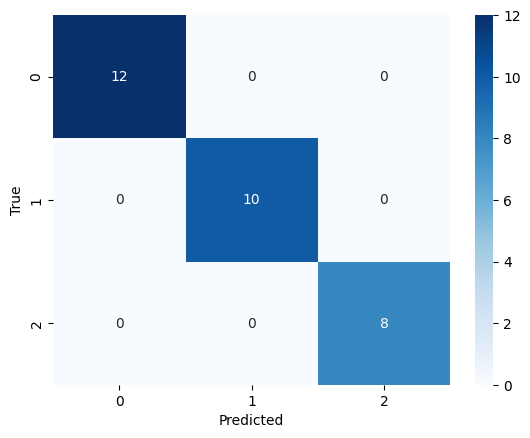

In [118]:
# confusion matrix와 visualization

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### (2-2) DT (decision tree)

<img src="https://blog.kakaocdn.net/dn/M8NvT/btqFNsczW7S/7L7TecOCcE9YlFIMBSwKJ0/img.png" width="500px">

- 질문 (test)를 만들기 위한 학습을 진행하여, 각 class별로 효과적으로 분류하기 위한 모델이다.
- DT의 순서
    - (1) 이등분의 효과가 가장 큰 test (gini가 가장 높은 것)가 가장 먼저 배치됨 
        - 보통은 root node에 있는 test에 사용된 feature가 feature_importance가 가장 높은 경향이 있음
    - (2) test를 계속 만들어 가지치기를 하고, 최종적으로는 leaf node가 순수히 한 class만 남도록 학습 (value에서 확인 가능)
- DT의 장점
    - 시각적으로 매우 효과적으로 분류 이해 가능
    - scaling을 굳이 하지 않아도 됨 (normalization)
- DT의 단점
    - DecisionTreeRegressor에서, 범위가 넘어간 값을 회귀로 예측 불가능 (오직 train set으로 학습한 범위 내에서만 예측이 가능하게 됨)
   

In [119]:
# 실습은 내가 만든 데이터로 진행한다. chatGPT에게 부탁한 부대찌개 데이터이다.

import pandas as pd

feature = ['salt_content', 'sugar_content', 'weight', 'sausage', 'ham', 'label']

data = [
    [4.5, 2.0, 700, 12, 15, '의정부'],
    [5.0, 2.5, 750, 14, 18, '송탄'],
    [4.0, 1.8, 680, 10, 12, '의정부'],
    [5.2, 2.1, 720, 15, 20, '송탄'],
    [4.8, 2.3, 730, 13, 16, '의정부'],
    [5.1, 2.7, 780, 16, 19, '송탄'],
    [4.3, 1.9, 690, 11, 13, '의정부'],
    [5.3, 2.4, 760, 14, 21, '송탄'],
    [4.4, 2.0, 710, 12, 14, '의정부'],
    [5.4, 2.8, 800, 17, 22, '송탄'],
    [4.6, 2.2, 740, 13, 15, '의정부'],
    [5.5, 2.6, 770, 15, 20, '송탄'],
    [4.7, 1.7, 660, 10, 12, '의정부'],
    [5.6, 2.3, 740, 14, 19, '송탄'],
    [4.2, 1.8, 670, 11, 13, '의정부'],
    [5.7, 2.9, 810, 18, 23, '송탄'],
    [4.9, 2.1, 720, 12, 17, '의정부'],
    [5.8, 2.5, 790, 16, 21, '송탄'],
    [4.1, 1.6, 650, 9, 11, '의정부'],
    [5.9, 2.4, 760, 14, 20, '송탄'],
    [4.2, 2.0, 700, 12, 14, '의정부'],
    [6.0, 2.8, 830, 19, 24, '송탄'],
    [4.3, 1.5, 640, 9, 10, '의정부'],
    [6.1, 2.6, 810, 15, 22, '송탄'],
    [4.4, 1.9, 680, 11, 13, '의정부'],
    [6.2, 2.7, 850, 17, 25, '송탄'],
    [4.5, 2.2, 720, 13, 18, '의정부'],
    [6.3, 2.9, 870, 18, 26, '송탄'],
    [4.6, 2.3, 740, 14, 19, '의정부'],
    [6.4, 3.0, 890, 19, 27, '송탄'],
    [4.7, 1.8, 650, 10, 12, '의정부'],
    [6.5, 2.5, 780, 15, 23, '송탄'],
    [4.8, 2.4, 760, 14, 21, '의정부'],
    [6.6, 3.1, 910, 20, 28, '송탄'],
    [4.9, 2.1, 730, 13, 20, '의정부'],
    [6.7, 2.9, 900, 19, 26, '송탄'],
    [5.0, 1.5, 640, 9, 11, '의정부'],
    [6.8, 3.2, 930, 21, 29, '송탄'],
    [5.1, 2.3, 740, 14, 22, '의정부'],
    [6.9, 2.8, 920, 20, 27, '송탄'],
    [5.2, 2.4, 750, 15, 23, '의정부'],
    [7.0, 3.3, 950, 22, 30, '송탄'],
    [5.3, 2.6, 760, 16, 24, '의정부'],
    [7.1, 3.4, 970, 23, 31, '송탄'],
    [5.4, 2.5, 770, 17, 25, '의정부'],
    [7.2, 3.5, 990, 24, 32, '송탄'],
    [5.5, 2.8, 780, 18, 26, '의정부'],
    [7.3, 3.6, 1010, 25, 33, '송탄'],
    [5.6, 3.0, 790, 19, 27, '의정부'],
    [7.4, 3.7, 1030, 26, 34, '송탄'],
    [5.7, 2.9, 800, 20, 28, '의정부'],
    [7.5, 3.8, 1050, 27, 35, '송탄'],
]

df = pd.DataFrame(data, columns=feature)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salt_content   52 non-null     float64
 1   sugar_content  52 non-null     float64
 2   weight         52 non-null     int64  
 3   sausage        52 non-null     int64  
 4   ham            52 non-null     int64  
 5   label          52 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.6+ KB


,salt_content,sugar_content,weight,sausage,ham,label
0,4.5,2.0,700,12,15,의정부
1,5.0,2.5,750,14,18,송탄
2,4.0,1.8,680,10,12,의정부
3,5.2,2.1,720,15,20,송탄
4,4.8,2.3,730,13,16,의정부


In [120]:
# data split

boodaejjigae_input = df[['salt_content', 'sugar_content', 'weight', 'sausage', 'ham']].to_numpy()
boodaejjigae_target = df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(boodaejjigae_input, boodaejjigae_target,
                                                   test_size=0.2)

In [121]:
# max_depth를 3로 지정하여 학습 진행 및 점수

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit (X_train, y_train)

print ('train score : ', dt.score(X_train, y_train))
print ('test score : ', dt.score(X_test, y_test))
print ('feature importance : ', dt.feature_importances_)

train score :  0.9512195121951219
test score :  0.9090909090909091
feature importance :  [0.797304 0.       0.       0.       0.202696]


[[24  1]
 [ 2 25]]


[Text(0.6, 0.875, 'salt_content <= 5.75\ngini = 0.497\nsamples = 41\nvalue = [22, 19]\nclass = eujoengbu'),
 Text(0.4, 0.625, 'salt_content <= 4.95\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = songtan'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = songtan'),
 Text(0.6, 0.375, 'ham <= 21.0\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = songtan'),
 Text(0.4, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = eujoengbu'),
 Text(0.8, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = songtan'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = eujoengbu')]

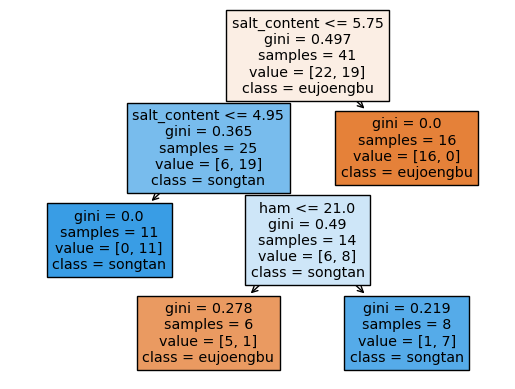

In [122]:
# confusion matrix 및 tree 시각화

from sklearn import tree

y_pred = dt.predict(boodaejjigae_input)
cm = confusion_matrix(y_pred, boodaejjigae_target)
print (cm)

tree.plot_tree(dt, feature_names=['salt_content', 'sugar_content', 'weight', 'sausage', 'ham'], 
               class_names=['eujoengbu', 'songtan'], filled=True)

#### (2-3) RF (random forest)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZK4N6%2FbtqFNaJzPjg%2FsukopDLDuKSIymy2KWPAYk%2Fimg.png" width="500px">

- random으로 feature를 선정해 node로 지정 후 분기할 때마다 DT와 같은 방식으로 분기해 나가는 weaker learner를 만들어 비교 후, 다수결의 원칙에 따라 가장 많은 category로 예측   

- tree를 이용한 가장 확실하고 효과적인 방법, 일반적으로 decision tree보다 train score가 높다.

- 구성원리 
    - bootstrap sampling : 각각의 weaker learner를 만들기 위해 사용, feature을 복원 추출하고, 그 feature 안에서도 복원 추출하는 방법
    - 다음 분기를 고를 때에도 랜덤하게 뽑음
    - OOB 검증 : 확실히 "복원 추출" 이기 때문에 봅히지 않은 샘플도 생기니, 이를 OOB에 넣어 validation test를 진행 (재활용성을 높인다)

In [123]:
# decision tree와 점수를 비교하기 위해 같은 데이터셋을 사용한다.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True) # OOB validation test 진행
rf.fit (X_train, y_train)

print ('train score : ', rf.score(X_train, y_train))
print ('test score : ', rf.score(X_test, y_test))
print ('feature importance : ', rf.feature_importances_)

train score :  1.0
test score :  0.8181818181818182
feature importance :  [0.38805735 0.11173218 0.18925481 0.14021645 0.1707392 ]


[[2 0]
 [2 7]]


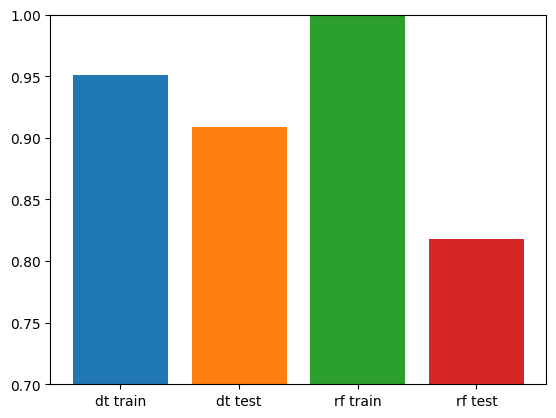

In [124]:
# confusion matrix 및 decision tree와 점수 비교 시각화

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print (cm)

plt.bar ('dt train', dt.score(X_train, y_train))
plt.bar ('dt test', dt.score(X_test, y_test))
plt.bar ('rf train', rf.score(X_train, y_train))
plt.bar ('rf test', rf.score(X_test, y_test))

plt.ylim((0.7, 1))

plt.show()

#### (2-4) LR (logistic regression)

<img src="https://editor.analyticsvidhya.com/uploads/23302main-qimg-7fc9e8601c15e33945720800aa237a7f.png" width="500px">

- 발단
    - (1) multiple regression에서 classification으로 변경 후에 범주형 y를 시각화하였더니, 중간 변수가 존재하지 않아 이산적인 그래프의 형태가 나타남
    - (2) Y가 범주형 변수라면 다중선형회귀 모델을 그대로 적용할 수 없음
    - (3) 그래서 logistic function (sigmoid function)을 도입하여 각 class에 대한 확률을 출력할 수 있도록 함
    
- 회귀식의 장점을 그대로 유지하고, 종속변수를 범주형이 아닌 확률로 둔 알고리즘
- odds (승산)의 개념을 이용하여 함수를 휘게 만듦 (중간 값은 0.5)
    - <img src="https://i.imgur.com/euw7qQu.png" width="500px">
    - activation function
        - 이중 분류 : sigmoid 
        - 다중 분류 : softmax

In [125]:
# 새로운 데이터를 만들었다. 100개의 records를 가진 인간 데이터 (chatGPT에게 부탁함)
# 키, 몸무게, 발 사이즈 (mm), 근육량, 성별 (target)

data = [
    [175.2, 68.5, 265.0, 32.4, "M"],
    [162.3, 54.7, 240.1, 25.3, "F"],
    [180.4, 75.2, 270.3, 35.1, "M"],
    [158.7, 52.6, 235.0, 24.0, "F"],
    [170.1, 60.8, 250.5, 29.7, "F"],
    [182.6, 80.3, 275.6, 38.2, "M"],
    [165.4, 58.9, 245.8, 27.6, "F"],
    [178.9, 72.4, 268.9, 33.9, "M"],
    [160.2, 55.3, 238.0, 26.1, "F"],
    [173.5, 66.7, 260.7, 31.0, "M"],
    [168.8, 62.2, 252.3, 28.5, "F"],
    [185.0, 85.0, 280.0, 40.0, "M"],
    [163.9, 57.1, 242.5, 26.8, "F"],
    [177.2, 70.0, 265.2, 33.0, "M"],
    [159.5, 53.9, 236.2, 25.1, "F"],
    [171.7, 61.4, 248.7, 29.1, "F"],
    [183.3, 78.5, 273.0, 36.5, "M"],
    [167.1, 59.8, 247.4, 27.9, "F"],
    [176.0, 68.0, 262.0, 32.0, "M"],
    [161.4, 56.0, 239.0, 26.0, "F"],
    [174.8, 65.5, 258.5, 30.5, "M"],
    [169.2, 63.0, 250.0, 28.8, "F"],
    [181.5, 77.0, 271.5, 35.7, "M"],
    [164.7, 57.5, 244.2, 27.0, "F"],
    [179.3, 73.1, 267.4, 34.2, "M"],
    [157.8, 52.2, 233.5, 23.9, "F"],
    [172.6, 64.2, 256.0, 30.0, "M"],
    [166.5, 60.5, 248.0, 28.2, "F"],
    [184.1, 81.0, 277.0, 37.5, "M"],
    [160.9, 55.8, 237.8, 25.8, "F"],
    [190.0, 90.0, 290.0, 41.0, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [188.5, 88.5, 285.0, 40.5, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [187.0, 87.0, 280.0, 40.0, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [186.0, 86.0, 278.0, 39.8, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [185.5, 85.5, 276.0, 39.6, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [184.5, 84.5, 274.0, 39.4, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [184.0, 84.0, 272.0, 39.2, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [183.5, 83.5, 270.0, 39.0, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [183.0, 83.0, 268.0, 38.8, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [182.5, 82.5, 266.0, 38.6, "F"],  # 여자가 남자보다 키와 몸무게가 큰 데이터
    [170.0, 60.0, 250.0, 29.5, "F"],
    [181.0, 76.5, 270.0, 35.0, "M"],
    [158.0, 51.5, 234.0, 23.5, "F"],
    [171.0, 61.0, 249.0, 29.0, "F"],
    [182.0, 79.0, 272.0, 37.0, "M"],
    [164.0, 58.0, 246.0, 27.5, "F"],
    [177.0, 71.0, 264.0, 32.5, "M"],
    [160.0, 54.0, 237.0, 25.0, "F"],
    [174.0, 67.0, 261.0, 31.5, "M"],
    [167.0, 61.0, 251.0, 28.0, "F"],
    [185.0, 84.0, 279.0, 39.0, "M"],
    [163.0, 56.0, 241.0, 26.0, "F"],
    [179.0, 74.0, 266.0, 33.5, "M"],
    [159.0, 52.5, 235.0, 24.5, "F"],
    [172.0, 62.0, 255.0, 30.0, "M"],
    [166.0, 59.5, 247.0, 28.5, "F"],
    [183.0, 77.5, 274.0, 36.0, "M"],
    [165.0, 58.5, 249.0, 27.0, "F"],
    [176.0, 69.5, 263.0, 32.5, "M"],
    [161.0, 56.5, 240.0, 26.5, "F"],
    [173.0, 65.0, 259.0, 30.0, "M"],
    [168.0, 62.5, 253.0, 28.5, "F"],
    [182.0, 78.0, 276.0, 35.5, "M"],
    [164.0, 57.0, 245.0, 26.5, "F"],
    [178.0, 72.0, 269.0, 34.0, "M"],
    [160.0, 54.5, 238.0, 25.0, "F"],
    [175.0, 66.5, 262.0, 31.5, "M"],
    [169.0, 60.5, 249.0, 28.0, "F"],
    [184.0, 80.0, 278.0, 37.0, "M"],
    [163.0, 55.5, 243.0, 26.0, "F"],
    [180.0, 75.5, 268.0, 34.5, "M"],
    [157.0, 51.0, 232.0, 23.5, "F"],
    [172.0, 63.5, 257.0, 30.5, "M"],
    [165.0, 60.0, 250.0, 27.5, "F"],
    [186.0, 82.5, 275.0, 38.0, "M"],
    [162.0, 55.0, 236.0, 25.5, "F"],
    [176.0, 70.5, 265.0, 33.5, "M"],
    [159.0, 53.5, 234.0, 24.5, "F"],
    [170.0, 60.5, 251.0, 29.0, "F"],
    [181.0, 77.0, 271.0, 35.0, "M"],
    [166.0, 59.0, 248.0, 28.0, "F"],
    [178.0, 71.5, 267.0, 33.5, "M"],
    [160.0, 54.0, 237.0, 25.0, "F"],
    [174.0, 67.5, 261.0, 31.5, "M"],
    [168.0, 61.5, 252.0, 28.5, "F"],
    [185.0, 84.5, 280.0, 39.5, "M"],
    [163.0, 55.0, 241.0, 26.0, "F"],
    [179.0, 73.5, 266.0, 34.5, "M"],
    [158.0, 52.0, 234.0, 24.0, "F"],
    [172.0, 63.0, 256.0, 30.5, "M"],
    [165.0, 59.5, 248.0, 28.0, "F"],
    [183.0, 78.0, 273.0, 36.5, "M"],
    [162.0, 56.0, 238.0, 25.5, "F"],
    [177.0, 70.0, 264.0, 33.0, "M"],
    [159.0, 53.0, 235.0, 24.5, "F"]
]

feature = ['height', 'weight', 'footsize', 'muscle', 'gender']

df = pd.DataFrame(data, columns=feature)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    95 non-null     float64
 1   weight    95 non-null     float64
 2   footsize  95 non-null     float64
 3   muscle    95 non-null     float64
 4   gender    95 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


,height,weight,footsize,muscle,gender
0,175.2,68.5,265.0,32.4,M
1,162.3,54.7,240.1,25.3,F
2,180.4,75.2,270.3,35.1,M
3,158.7,52.6,235.0,24.0,F
4,170.1,60.8,250.5,29.7,F


In [126]:
# input와 feature, train set과 test set으로 split, scaling

human_input = df[['height', 'weight', 'footsize', 'muscle']].to_numpy()
human_target = df['gender'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(human_input, human_target,
                                                    stratify=human_target,
                                                   test_size=0.2)

ss = StandardScaler()
ss.fit (X_train)

X_train_scaled = ss.transform (X_train)
X_test_scaled = ss.transform (X_test)

In [127]:
# random search 사용하여 최적의 C, max_iter 선택

from sklearn.linear_model import LogisticRegression

param_grid = {
    'C' : uniform(1, 50), 
    'max_iter' : randint(5, 50)
}

lr = LogisticRegression()

rs = RandomizedSearchCV(lr, param_grid, n_iter=50, n_jobs=-1) # core 전부 돌리기, epoch 50번
rs.fit (X_train_scaled, y_train)

print ("best parameter : ", rs.best_params_)
print ("validation score : ", np.max(rs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", rs.best_estimator_) 

lr = rs.best_estimator_

print ('train score : ', lr.score(X_train_scaled, y_train))
print ('test score : ', lr.score(X_test_scaled, y_test))

best parameter :  {'C': 47.607880565618295, 'max_iter': 17}
validation score :  0.9866666666666667
best model :  LogisticRegression(C=47.607880565618295, max_iter=17)
train score :  0.9868421052631579
test score :  0.8947368421052632


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[[9 2]
 [0 8]]
proba : [9.99990482e-01 9.51796436e-06] | real : F
proba : [0.9953061 0.0046939] | real : F
proba : [0.00311105 0.99688895] | real : M
proba : [0.98722413 0.01277587] | real : F
proba : [0.95718661 0.04281339] | real : F
proba : [9.99989712e-01 1.02881023e-05] | real : F
proba : [0.17825705 0.82174295] | real : M
proba : [0.86072132 0.13927868] | real : F
proba : [0.36967693 0.63032307] | real : F
proba : [9.99920764e-01 7.92357441e-05] | real : F
proba : [0.00123599 0.99876401] | real : F
proba : [0.18264444 0.81735556] | real : M
proba : [0.3333105 0.6666895] | real : M
proba : [0.04261976 0.95738024] | real : M
proba : [0.16579456 0.83420544] | real : M
proba : [0.02705543 0.97294457] | real : M
proba : [9.99950061e-01 4.99389789e-05] | real : F
proba : [0.04759112 0.95240888] | real : M
proba : [0.99491146 0.00508854] | real : F


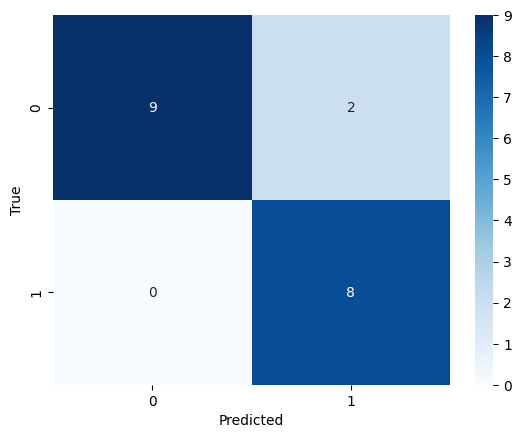

In [128]:
# confusion matrix와 visualization

y_pred = lr.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)

proba = lr.predict_proba(X_test_scaled)
for i in range (len(X_test_scaled)) :
    print (f"proba : {proba[i]} | real : {y_test[i]}")

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### (3) 
- back progation에서 역전파 시 기울기 소실이 발생 (미분이 계속 진행되다가 0이 됨) 
- 최근 사실을 까먹음 (short term loss) -> LSTM 탄생 (long & short term) -> GPU 사용 (속도를 계산한 것 : GRU)

#### (4) 
- heatmap 그릴 시에 label에 대한 상관관계가 제일 중요, 따라서 모든 attribute에 대한 상관관계를 시각화할 것
    - 왜냐면, label에 상관관계가 높은 feature들만 selection하여 모델의 score을 높일 수도 있기 때문
- 가장 중요한 건 label의 도수가 일정한 지를 확인하기 위한 bar plot
- feature를 과다 사용하면 overfitting이 일어날 수 있기 때문에 score가 낮을 시에는 feature selection이 필요